# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt #had to add this import for the pie chart plot to work

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:
 1. Create a variable named monthly_income, and set its value to 12000.
 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.
 3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.
    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.
 4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.  

In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio is: 
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income

monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC

btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable

print(json.dumps(btc_response,indent = 4, sort_keys = True))


{
    "data": {
        "1": {
            "circulating_supply": 19354718,
            "id": 1,
            "last_updated": 1682301587,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 537396726144,
                    "percent_change_1h": 0.388744692120901,
                    "percent_change_24h": 0.839356714949582,
                    "percent_change_7d": -8.39143954600609,
                    "percentage_change_1h": 0.388744692120901,
                    "percentage_change_24h": 0.839356714949582,
                    "percentage_change_7d": -8.39143954600609,
                    "price": 27762.0,
                    "volume_24h": 11951883948
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19354718,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenc

In [7]:
# Using the Python requests library, make an API call to access the current price ETH

eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable

print(json.dumps(eth_response, indent = 4, sort_keys = True))


{
    "data": {
        "1027": {
            "circulating_supply": 120412140,
            "id": 1027,
            "last_updated": 1682301585,
            "max_supply": 120412140,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 225698067466,
                    "percent_change_1h": 0.307625277070706,
                    "percent_change_24h": 0.909659268657394,
                    "percent_change_7d": -11.6001382069824,
                    "percentage_change_1h": 0.307625277070706,
                    "percentage_change_24h": 0.909659268657394,
                    "percentage_change_7d": -11.6001382069824,
                    "price": 1872.84,
                    "volume_24h": 7498580277
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120412140,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cry

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC

btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC

btc_price


27762.0

In [9]:
# Navigate the BTC response object to access the current price of ETH

eth_price = eth_response ['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH

eth_price


1872.84

### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 

btc_value = btc_price * btc_coins #Value of the btc holdings is the current btc price x the number of btc coins defined in Part 1 above (e.g. 1.2)

# Print current value of your holding in BTC

btc_value


33314.4

In [11]:
# Compute the current value of the ETH holding

eth_value = eth_price * eth_coins ##Value of the eth holdings is the current eth price x the number of ethc coins defined in Part 1 above (e.g. 5.3)

# Print current value of your holding in ETH

eth_value


9926.052

In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding

total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance

total_crypto_wallet


43240.452000000005

### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio

tickers = ['SPY','AGG']


# Set timeframe to 1Day

timeframe = '1Day'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
           
start_date = pd.Timestamp("2023-04-21", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-04-21", tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [16]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame

df_sbportfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

df_sbportfolio


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2023-04-21 04:00:00+00:00,99.51,99.56,99.11,99.17,5294282,19339,99.198584,AGG
2023-04-21 04:00:00+00:00,412.19,412.68,410.17,412.20,72023892,468905,411.767653,SPY


In [17]:
# Reorganize the DataFrame
# Separate ticker data

agg = df_sbportfolio[df_sbportfolio['symbol']=='AGG'].drop('symbol', axis = 1)

spy = df_sbportfolio[df_sbportfolio['symbol']=='SPY'].drop('symbol', axis = 1)

# print(agg,spy)

# Concatenate the ticker DataFrames

sbportfolio_df = pd.concat([agg,spy],axis = 1, keys = ['AGG','SPY'])

# Review the first 5 rows of the Alpaca DataFrame

sbportfolio_df.head()

AGG                                            \
                            open   high    low  close   volume trade_count   
timestamp                                                                    
2023-04-21 04:00:00+00:00  99.51  99.56  99.11  99.17  5294282       19339   

                                         SPY                                   \
                                vwap    open    high     low  close    volume   
timestamp                                                                       
2023-04-21 04:00:00+00:00  99.198584  412.19  412.68  410.17  412.2  72023892   

                                                   
                          trade_count        vwap  
timestamp                                          
2023-04-21 04:00:00+00:00      468905  411.767653

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [18]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number

agg_close_price = float(sbportfolio_df['AGG']['close'])

# Print the AGG closing price
                        
agg_close_price


99.17

In [19]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number

spy_close_price = float(sbportfolio_df['SPY']['close'])

# Print the SPY closing price
                                       
spy_close_price

412.2

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [20]:
# Calculate the current value of the bond portion of the portfolio

agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio

agg_value


19834.0

In [21]:
# Calculate the current value of the stock portion of the portfolio

spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio

spy_value


45342.0

In [22]:
# Calculate the total value of the stock and bond portion of the portfolio

total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio

total_stocks_bonds


65176.0

In [23]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current value of the entire portfolio (**Note**: The sample code asked for the Total value of the crypto wallet, but since that was already printed in Part 1
# and following the logical sequence of the exercise, I changed this to print the total portfolio value instead (e.g. crypto plus bonds and stocks)

total_portfolio


108416.452

### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [24]:
# Consolidate financial assets data into a Python list

savings_data = [total_crypto_wallet,
total_stocks_bonds]

# Review the Python list savings_data

print(savings_data)
    

[43240.452000000005, 65176.0]


#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [25]:
# Create a Pandas DataFrame called savings_df 

savings_df = pd.DataFrame({'Amount': savings_data}, index=['crypto', 'stocks/bonds'])

# Display the savings_df DataFrame

savings_df


,Amount
crypto,43240.452
stocks/bonds,65176.000


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

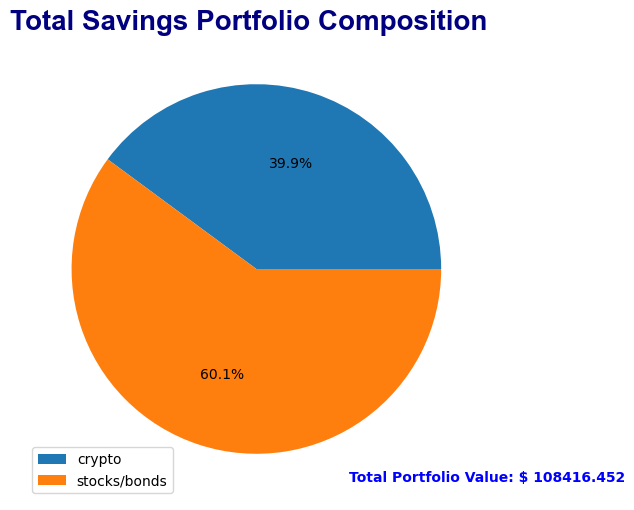

In [26]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart

pie = savings_df.plot.pie(figsize = (6,6), labels = None, y = 'Amount', autopct = '%1.1f%%') # the autopct(%) allows for the % labels to show in the pie slices

title_styles = {'fontname': 'Arial', 'fontsize': 20, 'fontweight': 'bold', 'color': 'navy'}

# These below are to show a legend with the total value of the portfolio, which is useful in pie charts and to suppress the y axis, which is not used
# **Note*: For these commands to work is that we added the matplotlib as plt import command at the top

plt.text(0.5,-1.15, 'Total Portfolio Value: $ ' + str(total_portfolio), fontsize = 10, fontweight = 'bold', color = 'blue')

plt.title('Total Savings Portfolio Composition',loc='right', fontdict= title_styles)

# Hide the y-axis, as it is not used in pie charts

pie.set_ylabel('')
pie.axis('off')
pie.legend(labels=savings_df.index, loc = 'lower left', fontsize = 10)

plt.show()

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [28]:
# Create a variable named emergency_fund_value

emergency_fund_value = monthly_income * 3

emergency_fund_value


36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [30]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:


cover_pct = 100 * (total_portfolio / emergency_fund_value)
delta = total_portfolio - emergency_fund_value

if total_portfolio > emergency_fund_value:
    print(f'Congratulations! The total value of your portfolio is ${total_portfolio}, covering your emergency fund target value of $ {emergency_fund_value} by {cover_pct:.2f} %')
elif total_portfolio == emergency_fund_value:
    print(f'Congratulations! The total value of your portfolio is ${total_portfolio}, covering {cover_pct:.2f} % of your emergency fund target of $ {emergency_fund_value}')
else:
    print(f'The total portfolio value of ${total_portfolio} is $ {delta} short from your emergency fund target value of $ {emergency_fund_value}, you only have {cover_pct:.2f} % of that target currently')


Congratulations! The total value of your portfolio is $108416.452, covering your emergency fund target value of $ 36000 by 301.16 %


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](../Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](../Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [35]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 

start_date20 = pd.Timestamp("2020-04-21", tz="America/New_York").isoformat()
end_date23 = pd.Timestamp("2023-04-21", tz="America/New_York").isoformat()


In [36]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame

df_prices = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date20,
    end = end_date23
).df

df_prices


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-04-21 04:00:00+00:00,117.43,117.44,117.0700,117.1400,4660507,19425,117.166762,AGG
2020-04-22 04:00:00+00:00,117.16,117.24,116.9400,117.1400,4647244,17538,117.056879,AGG
2020-04-23 04:00:00+00:00,117.33,117.45,117.1900,117.4200,4331115,18473,117.341656,AGG
2020-04-24 04:00:00+00:00,117.22,117.39,117.2000,117.3595,3162137,14100,117.295003,AGG
2020-04-27 04:00:00+00:00,117.21,117.36,116.8200,116.8200,5576322,17632,116.931177,AGG
...,...,...,...,...,...,...,...,...
2023-04-17 04:00:00+00:00,412.37,413.96,411.0850,413.9400,66447057,478342,412.589811,SPY
2023-04-18 04:00:00+00:00,415.58,415.72,412.7802,414.2100,63567329,493414,414.073765,SPY
2023-04-19 04:00:00+00:00,412.22,415.08,412.1600,414.1400,55252464,421201,413.662834,SPY


In [37]:
# Reorganize the DataFrame
# Separate ticker data

agg = df_prices[df_prices['symbol']=='AGG'].drop('symbol', axis = 1)

spy = df_prices[df_prices['symbol']=='SPY'].drop('symbol', axis = 1)

# Concatenate the ticker DataFrames

df_prices = pd.concat([agg,spy],axis = 1, keys = ['AGG','SPY'])

# Display both the first and last five rows of the DataFrame
df_prices.head()

AGG                                     \
                             open    high     low     close   volume   
timestamp                                                              
2020-04-21 04:00:00+00:00  117.43  117.44  117.07  117.1400  4660507   
2020-04-22 04:00:00+00:00  117.16  117.24  116.94  117.1400  4647244   
2020-04-23 04:00:00+00:00  117.33  117.45  117.19  117.4200  4331115   
2020-04-24 04:00:00+00:00  117.22  117.39  117.20  117.3595  3162137   
2020-04-27 04:00:00+00:00  117.21  117.36  116.82  116.8200  5576322   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2020-04-21 04:00:00+00:00       19425  117.166762  276.73  278.04  272.02   
2020-04-22 04:00:00+00:00       17538  117.056879  278.35  281.00  276.91   
2020-04-23 04:00:00+00:00       18473  117.341656  280.49  283.94  278.75   
2020-04-24 04:00:00+00:00       14100  117.295003  280.73  283.70  278.50   
2020-04-27 04:00:00+00:00       17632  116.931177  285.12  288.27  284.62   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2020-04-21 04:00:00+00:00  273.17  126385698      923551  274.755317  
2020-04-22 04:00:00+00:00  279.04   93524584      527777  278.482513  
2020-04-23 04:00:00+00:00  279.01  104753796      688622  280.966290  
2020-04-24 04:00:00+00:00  282.89   85169903      438571  281.032342  
2020-04-27 04:00:00+00:00  287.10   78438608      430206  286.528977

In [38]:
df_prices.tail()

AGG                                             \
                            open    high    low  close   volume trade_count   
timestamp                                                                     
2023-04-17 04:00:00+00:00  99.13  99.175  98.88  98.90  4441277       18511   
2023-04-18 04:00:00+00:00  98.91  99.160  98.91  99.04  4753038       17653   
2023-04-19 04:00:00+00:00  98.89  98.930  98.71  98.89  3592906       18630   
2023-04-20 04:00:00+00:00  99.21  99.360  99.19  99.34  5092430       18730   
2023-04-21 04:00:00+00:00  99.51  99.560  99.11  99.17  5294282       19339   

                                         SPY                            \
                                vwap    open    high       low   close   
timestamp                                                                
2023-04-17 04:00:00+00:00  98.944350  412.37  413.96  411.0850  413.94   
2023-04-18 04:00:00+00:00  99.022777  415.58  415.72  412.7802  414.21   
2023-04-19 04:00:00+00:00  98.843915  412.22  415.08  412.1600  414.14   
2023-04-20 04:00:00+00:00  99.286706  411.21  413.70  410.2700  411.88   
2023-04-21 04:00:00+00:00  99.198584  412.19  412.68  410.1700  412.20   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-04-17 04:00:00+00:00  66447057      478342  412.589811  
2023-04-18 04:00:00+00:00  63567329      493414  414.073765  
2023-04-19 04:00:00+00:00  55252464      421201  413.662834  
2023-04-20 04:00:00+00:00  75839327      546265  412.016996  
2023-04-21 04:00:00+00:00  72023892      468905  411.767653

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [39]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.

MC_30year = MCSimulation(
    portfolio_data = df_prices,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)


# Review the simulation input data

MC_30year.portfolio_data.head()

AGG                                     \
                             open    high     low     close   volume   
timestamp                                                              
2020-04-21 04:00:00+00:00  117.43  117.44  117.07  117.1400  4660507   
2020-04-22 04:00:00+00:00  117.16  117.24  116.94  117.1400  4647244   
2020-04-23 04:00:00+00:00  117.33  117.45  117.19  117.4200  4331115   
2020-04-24 04:00:00+00:00  117.22  117.39  117.20  117.3595  3162137   
2020-04-27 04:00:00+00:00  117.21  117.36  116.82  116.8200  5576322   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2020-04-21 04:00:00+00:00       19425  117.166762          NaN  276.73   
2020-04-22 04:00:00+00:00       17538  117.056879     0.000000  278.35   
2020-04-23 04:00:00+00:00       18473  117.341656     0.002390  280.49   
2020-04-24 04:00:00+00:00       14100  117.295003    -0.000515  280.73   
2020-04-27 04:00:00+00:00       17632  116.931177    -0.004597  285.12   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2020-04-21 04:00:00+00:00  278.04  272.02  273.17  126385698      923551   
2020-04-22 04:00:00+00:00  281.00  276.91  279.04   93524584      527777   
2020-04-23 04:00:00+00:00  283.94  278.75  279.01  104753796      688622   
2020-04-24 04:00:00+00:00  283.70  278.50  282.89   85169903      438571   
2020-04-27 04:00:00+00:00  288.27  284.62  287.10   78438608      430206   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-04-21 04:00:00+00:00  274.755317          NaN  
2020-04-22 04:00:00+00:00  278.482513     0.021488  
2020-04-23 04:00:00+00:00  280.966290    -0.000108  
2020-04-24 04:00:00+00:00  281.032342     0.013906  
2020-04-27 04:00:00+00:00  286.528977     0.014882

In [40]:
MC_30year.portfolio_data.tail()

AGG                                             \
                            open    high    low  close   volume trade_count   
timestamp                                                                     
2023-04-17 04:00:00+00:00  99.13  99.175  98.88  98.90  4441277       18511   
2023-04-18 04:00:00+00:00  98.91  99.160  98.91  99.04  4753038       17653   
2023-04-19 04:00:00+00:00  98.89  98.930  98.71  98.89  3592906       18630   
2023-04-20 04:00:00+00:00  99.21  99.360  99.19  99.34  5092430       18730   
2023-04-21 04:00:00+00:00  99.51  99.560  99.11  99.17  5294282       19339   

                                                      SPY                    \
                                vwap daily_return    open    high       low   
timestamp                                                                     
2023-04-17 04:00:00+00:00  98.944350    -0.005030  412.37  413.96  411.0850   
2023-04-18 04:00:00+00:00  99.022777     0.001416  415.58  415.72  412.7802   
2023-04-19 04:00:00+00:00  98.843915    -0.001515  412.22  415.08  412.1600   
2023-04-20 04:00:00+00:00  99.286706     0.004551  411.21  413.70  410.2700   
2023-04-21 04:00:00+00:00  99.198584    -0.001711  412.19  412.68  410.1700   

                                                                     \
                            close    volume trade_count        vwap   
timestamp                                                             
2023-04-17 04:00:00+00:00  413.94  66447057      478342  412.589811   
2023-04-18 04:00:00+00:00  414.21  63567329      493414  414.073765   
2023-04-19 04:00:00+00:00  414.14  55252464      421201  413.662834   
2023-04-20 04:00:00+00:00  411.88  75839327      546265  412.016996   
2023-04-21 04:00:00+00:00  412.20  72023892      468905  411.767653   

                                        
                          daily_return  
timestamp                               
2023-04-17 04:00:00+00:00     0.003588  
2023-04-18 04:00:00+00:00     0.000652  
2023-04-19 04:00:00+00:00    -0.000169  
2023-04-20 04:00:00+00:00    -0.005457  
2023-04-21 04:00:00+00:00     0.000777

In [42]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns

MC_30year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\lutov\OneDrive\desktop\FinTech-Workspace\github_connect\5.Financial_Planner\Solution\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006082,1.000686,0.994484,1.004632,1.004432,0.997116,1.012853,0.998337,1.008223,1.005950,...,0.999423,1.002771,1.007472,1.004627,1.002475,1.000450,1.002715,0.995486,0.995813,0.998271
2,1.000345,1.001732,0.987237,1.003469,1.009369,1.007781,1.009131,0.997734,1.018825,1.004756,...,0.998554,1.013760,1.010252,1.008110,1.010388,1.004870,1.001611,0.997273,1.004382,0.985890
3,1.012567,1.001699,0.985807,1.007186,1.009328,1.014733,1.017927,0.987954,1.007626,1.004135,...,1.003062,1.007538,0.999513,0.996254,1.007757,1.003699,0.996922,0.989665,0.999803,0.977269
4,0.996811,1.002129,0.990296,1.007963,0.997266,1.010870,1.020361,0.990240,1.009549,1.011827,...,1.002457,1.004060,1.013103,0.993590,1.006284,1.012830,0.992334,0.984865,0.997569,0.977232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.663769,12.945175,2.610518,5.172517,15.789785,10.992211,12.530397,4.888007,4.951837,6.372371,...,8.635208,6.379707,6.510433,11.494256,8.353130,11.744150,5.315020,8.274164,8.384657,5.372215
7557,11.651386,12.933992,2.648287,5.157741,15.885452,11.020874,12.654534,4.909371,4.967449,6.371417,...,8.616323,6.425809,6.455497,11.476229,8.426403,11.623094,5.338377,8.290191,8.297587,5.359316
7558,11.694439,12.935937,2.667156,5.180462,15.975739,11.086267,12.803294,4.956233,4.946114,6.420635,...,8.603672,6.472389,6.484016,11.526581,8.468775,11.533887,5.372995,8.407079,8.203585,5.447700
7559,11.730086,12.965033,2.671813,5.142091,16.018183,11.083276,12.747242,4.991072,4.951965,6.497225,...,8.706426,6.477538,6.471629,11.526683,8.443313,11.515565,5.404392,8.551830,8.177093,5.411222


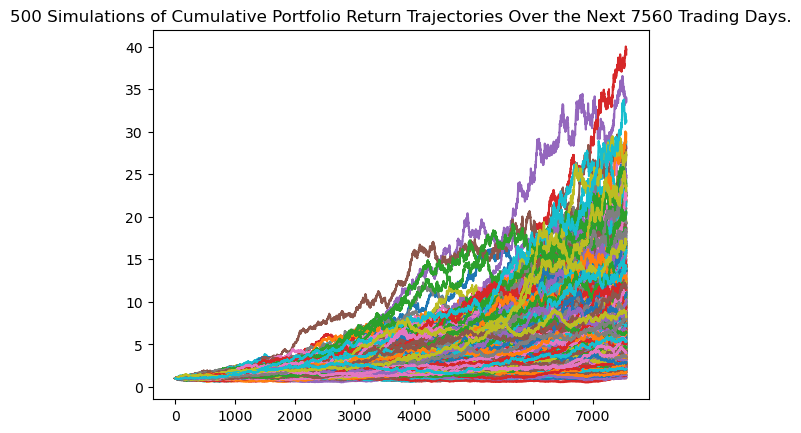

In [46]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot

MC_sim_line_plot = MC_30year.plot_simulation()

# Save the plot for future use
# Specify the path where you want to save the image
path30 = os.path.join(os.getcwd(), "Sol_Images", "MC_30_year_sim_plot.png")

# Save the image
MC_sim_line_plot.get_figure().savefig(path30, dpi=300, bbox_inches="tight")


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

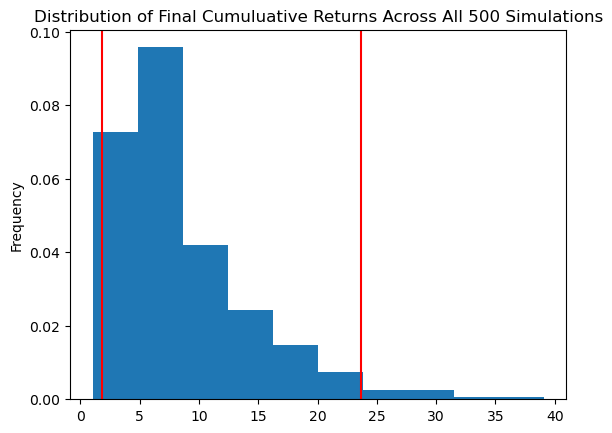

In [47]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram

MC_sim_dist_plot = MC_30year.plot_distribution()

#Save plot for future use
path301 = os.path.join(os.getcwd(), "Sol_Images", "MC_30year_dist_plot.png")

# Save the image
MC_sim_line_plot.get_figure().savefig(path301, dpi=300, bbox_inches="tight")

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [50]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable

MC_summary_stats = MC_30year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics

print(MC_summary_stats)

count           500.000000
mean              8.600349
std               5.815169
min               1.043229
25%               4.524559
50%               7.034332
75%              11.162556
max              39.069991
95% CI Lower      1.778328
95% CI Upper     23.622302
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [51]:
# Print the current balance of the stock and bond portion of the members portfolio
total_stocks_bonds

65176.0

In [52]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_summary_stats[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = MC_summary_stats[9] * total_stocks_bonds

# Print the result of your calculations

print(f"There is a 95% chance that the current stock/bonds portfolio value of $ {total_stocks_bonds} "
    f" will end within the range of"
    f" ${ci_lower_thirty_cumulative_return: .2f} and ${ci_upper_thirty_cumulative_return: .2f}"
    f" over the next 30 years.")



There is a 95% chance that the current stock/bonds portfolio value of $ 65176.0  will end within the range of $ 115904.29 and $ 1539607.15 over the next 30 years.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [53]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.

MC_10year = MCSimulation(
    portfolio_data = df_prices,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10
)


# Review the simulation input data for the 10 year/20-80 MC sim

MC_10year.portfolio_data.head()

AGG                                     \
                             open    high     low     close   volume   
timestamp                                                              
2020-04-21 04:00:00+00:00  117.43  117.44  117.07  117.1400  4660507   
2020-04-22 04:00:00+00:00  117.16  117.24  116.94  117.1400  4647244   
2020-04-23 04:00:00+00:00  117.33  117.45  117.19  117.4200  4331115   
2020-04-24 04:00:00+00:00  117.22  117.39  117.20  117.3595  3162137   
2020-04-27 04:00:00+00:00  117.21  117.36  116.82  116.8200  5576322   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2020-04-21 04:00:00+00:00       19425  117.166762          NaN  276.73   
2020-04-22 04:00:00+00:00       17538  117.056879     0.000000  278.35   
2020-04-23 04:00:00+00:00       18473  117.341656     0.002390  280.49   
2020-04-24 04:00:00+00:00       14100  117.295003    -0.000515  280.73   
2020-04-27 04:00:00+00:00       17632  116.931177    -0.004597  285.12   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2020-04-21 04:00:00+00:00  278.04  272.02  273.17  126385698      923551   
2020-04-22 04:00:00+00:00  281.00  276.91  279.04   93524584      527777   
2020-04-23 04:00:00+00:00  283.94  278.75  279.01  104753796      688622   
2020-04-24 04:00:00+00:00  283.70  278.50  282.89   85169903      438571   
2020-04-27 04:00:00+00:00  288.27  284.62  287.10   78438608      430206   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-04-21 04:00:00+00:00  274.755317          NaN  
2020-04-22 04:00:00+00:00  278.482513     0.021488  
2020-04-23 04:00:00+00:00  280.966290    -0.000108  
2020-04-24 04:00:00+00:00  281.032342     0.013906  
2020-04-27 04:00:00+00:00  286.528977     0.014882

In [54]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\lutov\OneDrive\desktop\FinTech-Workspace\github_connect\5.Financial_Planner\Solution\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010380,0.987296,1.001982,0.991582,1.009842,0.996633,0.968407,1.008913,1.008790,0.995940,...,1.005462,0.998912,1.016649,0.981624,1.004436,0.994600,0.978720,1.021177,0.987590,1.013584
2,1.019583,0.993179,1.000769,0.987262,1.007028,0.994833,0.961822,1.004425,1.012246,0.994274,...,0.995071,1.006095,1.021506,0.975724,1.010114,0.999267,0.985240,1.001393,0.987258,1.020695
3,1.015259,0.991389,1.003341,1.010436,0.996105,0.995965,0.961438,1.003865,1.021289,0.988352,...,0.999860,1.009474,1.019358,0.978213,1.013836,0.994608,0.975411,1.025159,1.003957,1.023851
4,1.005666,0.989475,0.992397,0.996755,0.997821,0.989594,0.970589,0.997238,1.022636,1.011608,...,1.001388,1.000905,1.019423,0.973695,0.994936,1.009522,0.983641,1.034215,0.993699,1.001138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.109466,1.312700,2.299196,4.466105,1.799301,1.885645,5.300493,2.540636,3.078673,4.046617,...,5.089490,10.803152,3.609143,1.744429,2.611885,2.011755,1.810305,2.585105,2.900589,1.451666
2517,1.119141,1.314728,2.342975,4.442489,1.807475,1.878956,5.341278,2.529737,3.100675,4.094919,...,5.115159,10.844520,3.668810,1.749606,2.611746,2.070477,1.822245,2.587797,2.859967,1.458127
2518,1.118246,1.307288,2.362694,4.403862,1.791419,1.898238,5.320089,2.522650,3.081350,4.102494,...,5.080163,10.737003,3.719216,1.770498,2.556750,2.097268,1.824578,2.628951,2.816389,1.443288
2519,1.116225,1.292651,2.377443,4.328924,1.814952,1.942190,5.267992,2.543878,3.076076,4.032229,...,5.035282,10.874902,3.757448,1.746735,2.571769,2.099701,1.842488,2.638704,2.828825,1.453133


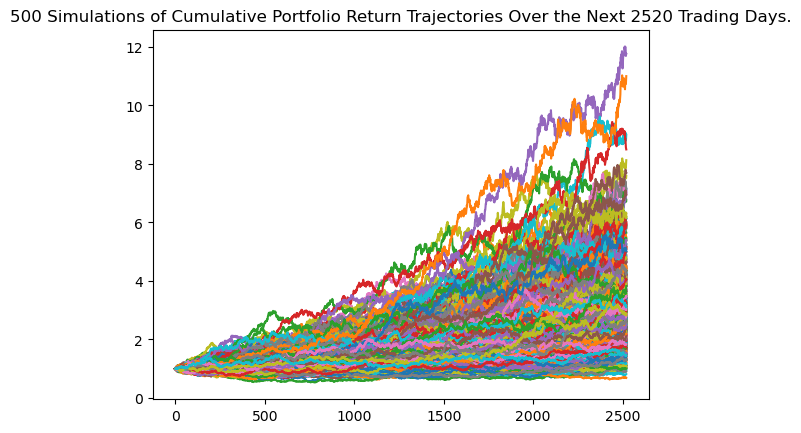

In [55]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot

MC_sim_line_plot = MC_10year.plot_simulation()

# Save the plot for future use
# Specify the path where you want to save the image
path10 = os.path.join(os.getcwd(), "Sol_Images", "MC_10_year_sim_plot.png")

# Save the image
MC_sim_line_plot.get_figure().savefig(path10, dpi=300, bbox_inches="tight")

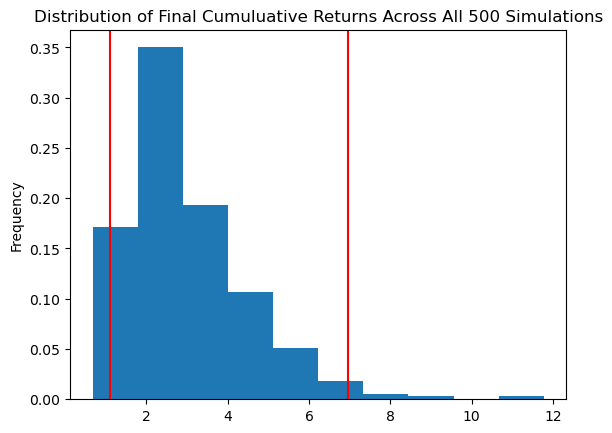

In [56]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot = MC_10year.plot_distribution()

#Save plot for future use
#Specify the path where to save
path101 = os.path.join(os.getcwd(), "Sol_Images", "MC_10year_dist_plot.png")

# Save the image
MC_sim_line_plot.get_figure().savefig(path101, dpi=300, bbox_inches="tight")

In [57]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC10_summary_stats = MC_10year.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
print(MC10_summary_stats)

count           500.000000
mean              3.012391
std               1.495198
min               0.687255
25%               1.956537
50%               2.693128
75%               3.698415
max              11.768338
95% CI Lower      1.097252
95% CI Upper      6.952162
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [58]:
# Print the current balance of the stock and bond portion of the members portfolio
total_stocks_bonds


65176.0

In [59]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = MC10_summary_stats[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = MC10_summary_stats[9] * total_stocks_bonds


# Print the result of your calculations

print(f"There is a 95% chance that the current stock/bonds portfolio value of $ {total_stocks_bonds} "
    f" will end within the range of"
    f" ${ci_lower_ten_cumulative_return: .2f} and ${ci_upper_ten_cumulative_return: .2f}"
    f" over the next 10 years.")

There is a 95% chance that the current stock/bonds portfolio value of $ 65176.0  will end within the range of $ 71514.51 and $ 453114.12 over the next 10 years.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

## END